# **CONVOLUTION NEURAL NETWORK|**

In [50]:
!git clone https://github.com/nithinganesh1/Deep_Learning_Projects.git

Cloning into 'Deep_Learning_Projects'...
remote: Enumerating objects: 1017, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 1017 (delta 6), reused 8 (delta 1), pack-reused 996 (from 1)
Receiving objects: 100% (1017/1017), 252.75 MiB | 22.73 MiB/s, done.
Resolving deltas: 100% (26/26), done.
Updating files: 100% (974/974), done.


In [51]:
cd Deep_Learning_Projects/Image_Classification/

/content/Deep_Learning_Projects/Image_Classification/Deep_Learning_Projects/Image_Classification


In [52]:
pwd

'/content/Deep_Learning_Projects/Image_Classification/Deep_Learning_Projects/Image_Classification'

**1.Import Libraries**

In [53]:
import tensorflow as tf
import os

In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**2.Remove Dodgy Images**

In [55]:
import cv2
import imghdr

In [56]:
data_dir = 'data'

In [57]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [60]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

**3.Load Images**

In [61]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 297 files belonging to 2 classes.


In [62]:
data_iterator = data.as_numpy_iterator()

In [63]:
batch = data_iterator.next()

In [64]:
len(batch)

2

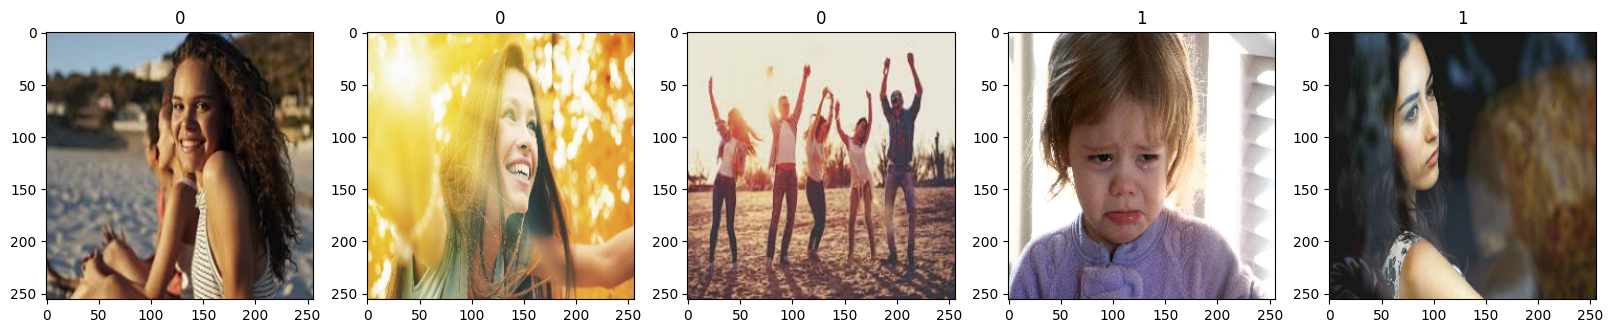

In [65]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

**4.Scale Data**

In [66]:
data = data.map(lambda x,y: (x/255, y))
#neural network perform well data into 0 to 1 smaller the data faster the perfomace

In [67]:
data.as_numpy_iterator().next()

(array([[[[0.30364582, 0.25266543, 0.07619485],
          [0.32156864, 0.27058825, 0.09411765],
          [0.3209865 , 0.27058825, 0.09586397],
          ...,
          [0.45226046, 0.37984067, 0.12127423],
          [0.590333  , 0.49064654, 0.12308422],
          [0.766299  , 0.65432465, 0.1871041 ]],
 
         [[0.30364582, 0.25266543, 0.07619485],
          [0.32156864, 0.27058825, 0.09411765],
          [0.32156864, 0.27058825, 0.09469976],
          ...,
          [0.4752451 , 0.3920037 , 0.12349878],
          [0.78328115, 0.6328216 , 0.17520536],
          [0.8293883 , 0.6566339 , 0.18822812]],
 
         [[0.29580268, 0.24482231, 0.06835172],
          [0.32941177, 0.2784314 , 0.10196079],
          [0.32941177, 0.2784314 , 0.10196079],
          ...,
          [0.4540441 , 0.35726103, 0.06994341],
          [0.80039304, 0.6199089 , 0.08240895],
          [0.8418998 , 0.6297301 , 0.11895249]],
 
         ...,
 
         [[0.42740837, 0.47054562, 0.5881927 ],
          [0.38831

**5.Split Data**

In [68]:
train_size = int(len(data)*.7) #70% train
val_size = int(len(data)*.2) #20% validation
test_size = int(len(data)*.1)#10% test

In [69]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


**6.Build DeepLearning Model**

In [70]:
from tensorflow.keras.models import Sequential #singl input and singl output
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [71]:
model = Sequential()

In [72]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape = (256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

**7.Train**

In [75]:
logdir = 'logs'

In [76]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [77]:
hist = model.fit(train,epochs=17,validation_data=val,callbacks=tensorboard_callback)

Epoch 1/17
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 643ms/step - accuracy: 0.5103 - loss: 1.0373 - val_accuracy: 0.5312 - val_loss: 0.6368
Epoch 2/17
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 613ms/step - accuracy: 0.5205 - loss: 0.6400 - val_accuracy: 0.6094 - val_loss: 0.5712
Epoch 3/17
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 681ms/step - accuracy: 0.6544 - loss: 0.5835 - val_accuracy: 0.8594 - val_loss: 0.4561
Epoch 4/17
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 733ms/step - accuracy: 0.8537 - loss: 0.4727 - val_accuracy: 0.8594 - val_loss: 0.3175
Epoch 5/17
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 564ms/step - accuracy: 0.7801 - loss: 0.4439 - val_accuracy: 0.9062 - val_loss: 0.3191
Epoch 6/17
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 641ms/step - accuracy: 0.8715 - loss: 0.2993 - val_accuracy: 0.9375 - val_loss: 0.2681
Epoch 7/17
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 757ms/step - accuracy: 0.9255 - loss: 0.3030 - val_accuracy: 0.9219 - val_loss: 0.2051
Epoch 8/17
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 614ms/step - accuracy: 0.9613 - loss: 0.1687 - val_accuracy: 0.9531 - val_loss:

**8.Evaluation**

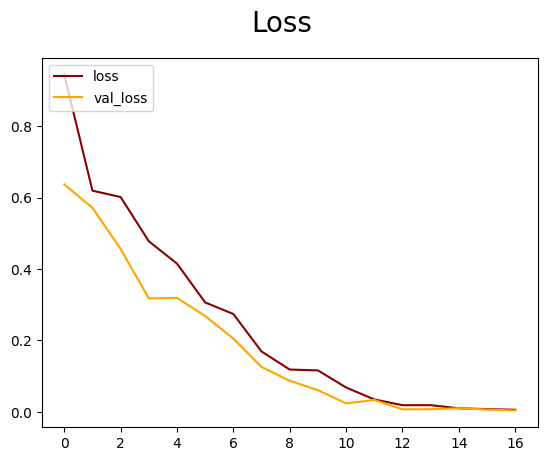

In [78]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='darkred', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

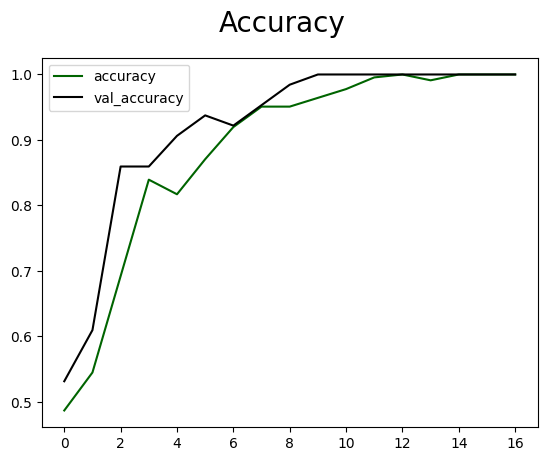

In [79]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='darkgreen', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='k', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [80]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

**9.Test**

In [81]:
import cv2

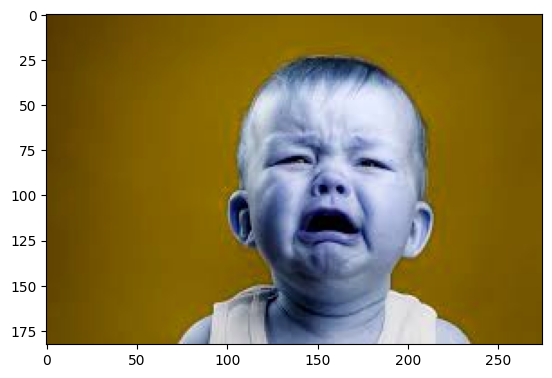

In [82]:
img = cv2.imread('/content/images_baby.jpg')
plt.imshow(img)
plt.show()

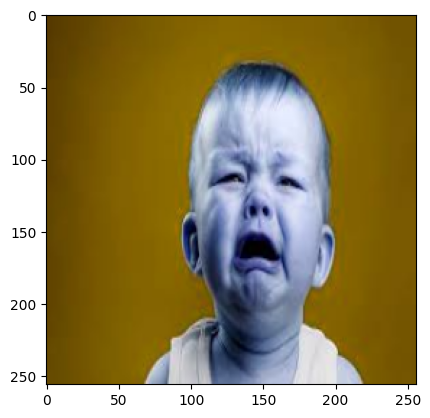

In [83]:
img = cv2.resize(img,(256,256))
plt.imshow(img)
plt.show()

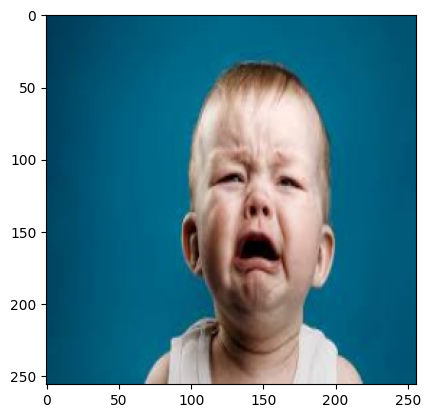

In [84]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


In [85]:
yhat = model.predict(np.expand_dims(img/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


In [86]:
yhat

array([[0.7800017]], dtype=float32)

In [87]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


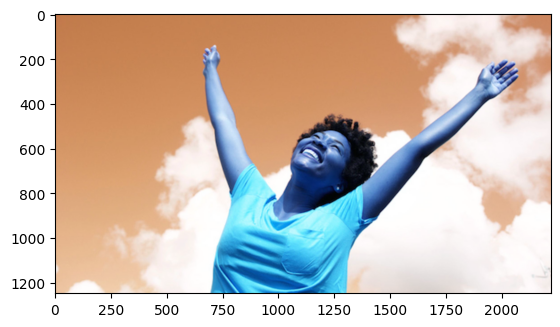

In [116]:
img = cv2.imread('istock-508455188.jpg')
plt.imshow(img)
plt.show()

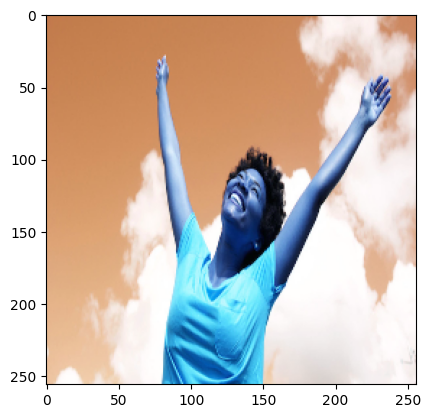

In [117]:
img = cv2.resize(img,(256,256))
plt.imshow(img)
plt.show()

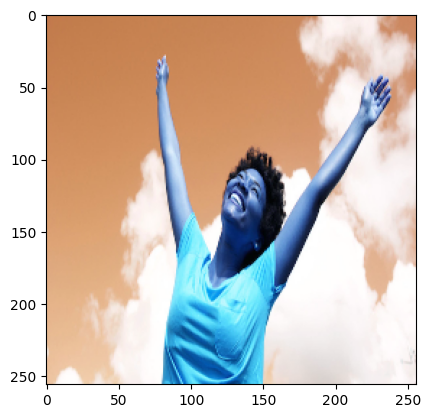

In [118]:
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [119]:
yhat = model.predict(np.expand_dims(img1/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [120]:
yhat

array([[0.21214777]], dtype=float32)

In [121]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


**10.Save the Model**

In [122]:
model.save(os.path.join('models','image_classifier_models.h5'))